In [404]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

## import raw data

In [405]:
df = pd.read_excel('../database/export_binance/df_new.xlsx', index_col=0)
df.head(15)

,User_ID,UTC_Time,Account,Operation,Coin,Change,Remark
1,1,2021-05-31 09:00:00,Spot,Deposit,SOL,25.000000,NaN
1,1,2021-05-31 09:00:00,Spot,Deposit,BTC,1.000000,NaN
1,1,2021-05-31 09:00:00,Spot,Deposit,BNB,35.000000,NaN
1,1,2021-05-31 09:00:00,Spot,Deposit,BUSD,50000.000000,NaN
1,1,2021-05-31 09:00:00,Spot,Deposit,USDT,50000.000000,NaN
821,11233391,2021-06-02 06:04:05,Spot,Transaction Related,BUSD,-2262.463770,NaN
822,11233391,2021-06-02 06:04:05,Spot,Buy,LTC,12.363190,NaN
823,11233391,2021-06-05 22:24:30,Card,Binance Card Spending,EUR,-33.000000,NaN
824,11233391,2021-06-07 06:24:37,Card,Card Cashback,BNB,0.000823,NaN
952,11233391,2021-06-08 05:10:12,Card,Card Cashback,BNB,0.003474,NaN


## spot wallet

### wallet balance overview

In [406]:
#spot balance per coin, enhanced with a current price in USDT
df_spot = df.loc[df['Account'] == 'Spot']
balance_spot = df_spot.groupby('Coin').sum()['Change']
df_current_prices = pd.read_excel('../database/prices/current_prices.xlsx', index_col=0)
holding_prices = []
for i in balance_spot.index:
    if i == 'USDT':
        holding_prices.append(1)
    else:
        try:
            price = df_current_prices.loc[df_current_prices['symbol'] == (i + 'USDT')]['price'].values[0]
            holding_prices.append(price)
        except:
            holding_prices.append(np.nan)
balance_spot = pd.DataFrame(balance_spot)
balance_spot['USDT_price'] = holding_prices
balance_spot['USDT_value'] = holding_prices * balance_spot['Change']
print(f'current total value: {round(balance_spot["USDT_value"].sum(), 2)} USDT')
balance_spot.sort_values(by='USDT_value', ascending=False, inplace=True)
balance_spot.head(5)

current total value: 82620.71 USDT


,Change,USDT_price,USDT_value
Coin,,,
BTC,1.372650,30153.4700,41390.155469
BUSD,21403.548085,1.0007,21418.530568
USDT,4416.448950,1.0000,4416.448950
ETH,2.299233,1786.2500,4107.005589
BNB,9.426420,287.9000,2713.866399


### trades per coin plot

In [407]:
df_hist_prices = pd.read_excel('../database/prices/historical_prices.xlsx')
df_hist_prices.set_index('datetime', inplace=True)
print(df_hist_prices.shape)
df_hist_prices.head(5)

(516, 33)


,SOLUSDT,BTCUSDT,BNBUSDT,BUSDUSDT,LTCUSDT,EURUSDT,LINKUSDT,AVAXUSDT,MATICUSDT,SUSHIUSDT,...,CAKEUSDT,DOTUSDT,BETAUSDT,WETHUSDT,FTTUSDT,CELRUSDT,RUNEUSDT,EDGUSDT,USDCUSDT,NEARUSDT
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1.8421,29331.69,37.7762,0.9973,126.24,1.2183,11.8477,3.6497,0.01777,3.333,...,0.0,8.2776,0.0,728.91,5.806,0.00479,1.2874,0,0.9974,1.3587
2021-01-02,1.7999,32178.33,38.2331,0.9989,136.96,1.2412,12.2215,3.4956,0.01904,3.203,...,0.0,9.2037,0.0,774.56,6.200,0.00480,1.2919,0,0.9989,1.4124
2021-01-03,2.1779,33000.05,41.2575,0.9979,161.24,1.2594,13.6814,3.4691,0.01997,3.445,...,0.0,10.1307,0.0,978.28,6.945,0.00538,1.4839,0,0.9992,1.4707
2021-01-04,2.4909,31988.71,41.1333,0.9993,155.34,1.2286,13.5935,3.5999,0.02468,3.563,...,0.0,9.5126,0.0,1041.43,7.535,0.00566,1.5929,0,0.9994,1.3868
2021-01-05,2.1636,33949.53,41.8219,0.9969,158.43,1.2274,14.5162,4.2501,0.02440,3.853,...,0.0,9.7084,0.0,1099.56,8.656,0.00592,1.5826,0,0.9969,1.4953


In [418]:
#get trade related operations
trades = df.loc[((df['Operation'] == 'Buy')) | ((df['Operation'] == 'Sell')) | ((df['Operation'] == 'Large OTC trading')) | ((df['Operation'] == 'Small assets exchange BNB')) | ((df['Operation'] == 'Transaction Related'))]
#separate columns for buy and sell and cut time from datetime
trades['buy'] = trades['Change'].apply(lambda x: x if x > 0 else np.nan)
trades['sell'] = trades['Change'].apply(lambda x: x if x < 0 else np.nan)
trades['UTC_Time'] = trades['UTC_Time'].apply(lambda x: x.strftime('%Y-%m-%d'))
trades = trades[['UTC_Time', 'buy', 'sell', 'Coin']].set_index('UTC_Time').sort_values(by=['Coin', 'buy'])
#delete duplicated dates
trades = trades.reset_index().groupby(['UTC_Time', 'Coin']).agg({'buy': 'sum', 'sell': 'sum'}).reset_index().sort_values(by=['Coin', 'UTC_Time'])
trades = trades.replace(0,np.nan)
trades['UTC_Time'] = pd.to_datetime(trades['UTC_Time'])
#trades.set_index('UTC_Time', inplace=True)
trades

,UTC_Time,Coin,buy,sell
34,2021-08-22,AAVE,5.7725,NaN
38,2021-08-24,AAVE,1.1000,NaN
43,2021-08-25,AAVE,NaN,-0.772500
82,2021-09-14,AAVE,NaN,-5.000000
91,2021-09-16,ADA,640.0000,NaN
...,...,...,...,...
260,2022-05-09,USDT,571.2388,NaN
262,2022-05-11,USDT,148.8300,NaN
155,2021-10-22,WETH,NaN,-1.164775
65,2021-09-08,XTZ,1643.4000,NaN


In [419]:
trades.sort_values(by='UTC_Time')

,UTC_Time,Coin,buy,sell
1,2021-06-02,LTC,12.36319,NaN
0,2021-06-02,BUSD,NaN,-2262.46377
3,2021-07-15,BUSD,NaN,-1919.40500
2,2021-07-15,AVAX,80.00000,NaN
4,2021-07-15,LINK,65.00000,NaN
...,...,...,...,...
259,2022-05-09,FTM,NaN,-340.00000
261,2022-05-11,SOL,NaN,-3.00000
262,2022-05-11,USDT,148.83000,NaN
263,2022-05-12,BUSD,321.50000,NaN


In [409]:
for i in trades['Coin'].unique():
    buy_name = i + '_buy'
    sell_name = i + '_sell'
    temp = trades.loc[trades['Coin'] == i]
    temp[buy_name] = temp['buy']
    temp[sell_name] = temp['sell']
    temp.drop(['Coin', 'buy', 'sell'], axis=1, inplace=True)
    df_hist_prices = pd.merge(df_hist_prices, temp, how='outer', left_index=True, right_index=True)
df_hist_prices

,SOLUSDT,BTCUSDT,BNBUSDT,BUSDUSDT,LTCUSDT,EURUSDT,LINKUSDT,AVAXUSDT,MATICUSDT,SUSHIUSDT,...,UNI_buy,UNI_sell,USDC_buy,USDC_sell,USDT_buy,USDT_sell,WETH_buy,WETH_sell,XTZ_buy,XTZ_sell
2021-01-01,1.8421,29331.69,37.7762,0.9973,126.24,1.2183,11.8477,3.6497,0.01777,3.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,1.7999,32178.33,38.2331,0.9989,136.96,1.2412,12.2215,3.4956,0.01904,3.203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,2.1779,33000.05,41.2575,0.9979,161.24,1.2594,13.6814,3.4691,0.01997,3.445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,2.4909,31988.71,41.1333,0.9993,155.34,1.2286,13.5935,3.5999,0.02468,3.563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,2.1636,33949.53,41.8219,0.9969,158.43,1.2274,14.5162,4.2501,0.02440,3.853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,41.1700,28629.80,301.6000,1.0013,61.60,1.0740,6.2900,22.5800,0.57400,1.422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-28,44.2500,29031.33,307.5000,1.0010,63.00,1.0730,6.5800,24.7600,0.58800,1.528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-29,44.9800,29468.10,305.8000,1.0011,63.60,1.0720,6.7100,26.1600,0.60000,1.498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-30,47.2200,31734.22,321.8000,1.0007,69.10,1.0770,7.4600,27.7100,0.65800,1.695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


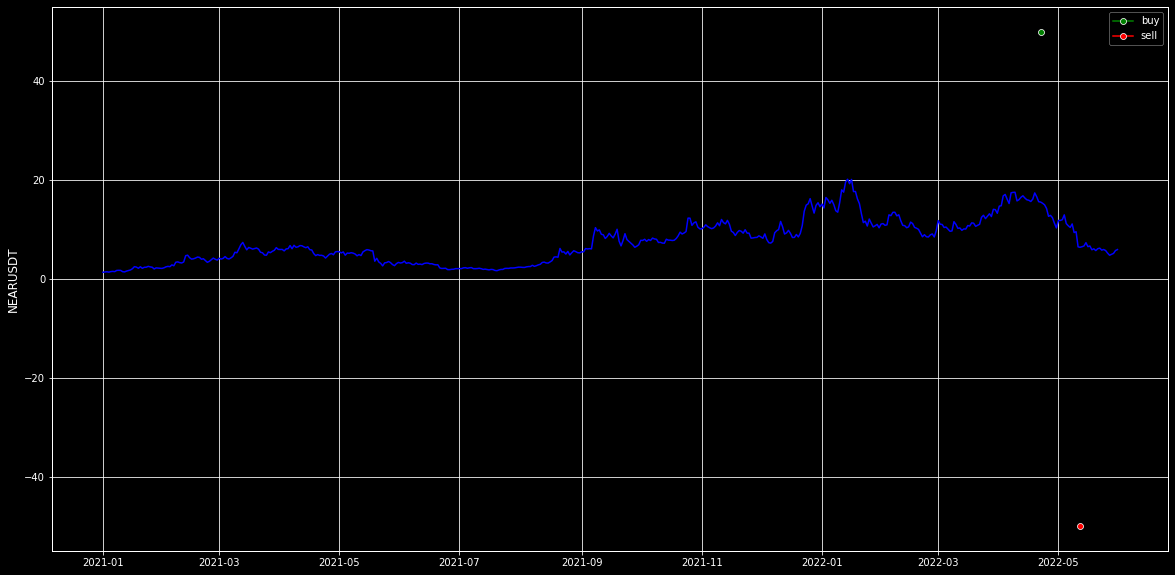

In [422]:
fig = plt.figure(figsize=(20, 10))
sns.lineplot(x=df_hist_prices.index, y='NEARUSDT', data=df_hist_prices, color='blue')
sns.lineplot(x=df_hist_prices.index, y='NEAR_buy', data=df_hist_prices, color='g', marker='o', label='buy')
sns.lineplot(x=df_hist_prices.index, y='NEAR_sell', data=df_hist_prices, color='r', marker='o', label='sell');

In [440]:
near = df_hist_prices[['NEARUSDT', 'NEAR_buy', 'NEAR_sell']]
near = near.loc[(near['NEAR_buy'] > 0) | (near['NEAR_sell'] < 0)]
near

,NEARUSDT,NEAR_buy,NEAR_sell
2022-04-22,15.569,50.0,NaN
2022-05-12,6.421,NaN,-50.0


In [441]:
near['NEAR_buy'] = near['NEAR_buy'].apply(lambda x: 1 if x > 0 else np.nan)
near['NEAR_sell'] = near['NEAR_sell'].apply(lambda x: 1 if x < 0 else np.nan)
near['NEAR_buy'] = near['NEAR_buy'] * near['NEARUSDT']
near['NEAR_sell'] = near['NEAR_sell'] * near['NEARUSDT']
near


,NEARUSDT,NEAR_buy,NEAR_sell
2022-04-22,15.569,15.569,NaN
2022-05-12,6.421,NaN,6.421


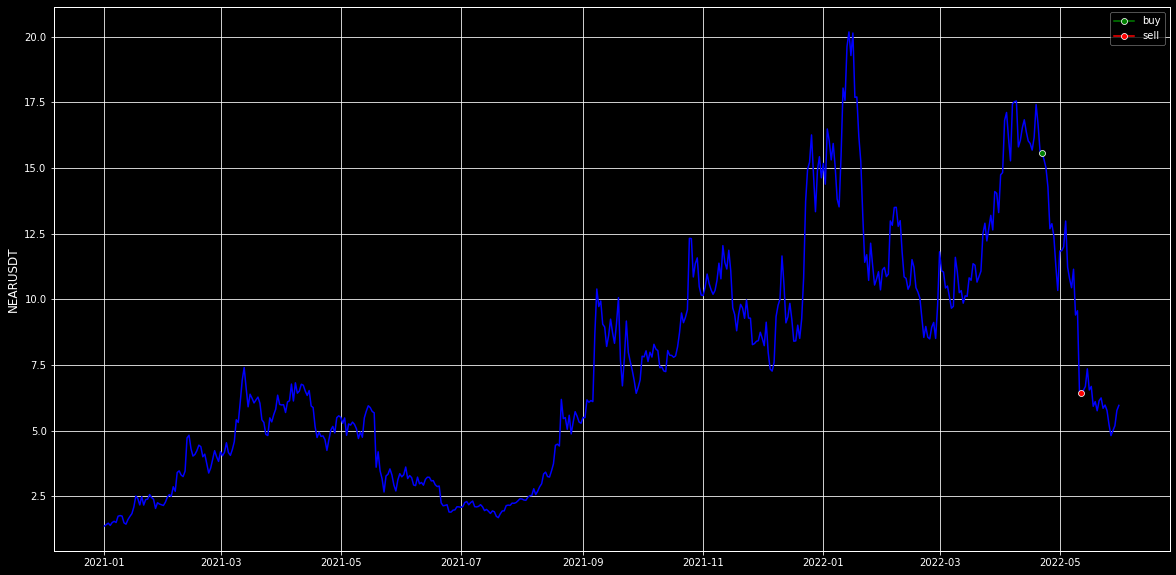

In [443]:
fig = plt.figure(figsize=(20, 10))
sns.lineplot(x=df_hist_prices.index, y='NEARUSDT', data=df_hist_prices, color='blue')
sns.lineplot(x=near.index, y='NEAR_buy', data=near, color='g', marker='o', label='buy')
sns.lineplot(x=near.index, y='NEAR_sell', data=near, color='r', marker='o', label='sell');